## Introduction
In this notebook, I will be focusing on the growth rates of the Covid-19 Coronavirus from different countries that have been highly impacted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = pd.read_csv('covid_19_data.csv')

data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [2]:
data = data.rename(index=str, columns={'Province/State' : 'Province_State'})
data = data.rename(index=str, columns={'Country/Region':'Country_Region'})
data = data.rename(index=str, columns={'Last Update':'Last_Update'})

In [3]:
data['Date'] = data['ObservationDate'].apply(pd.to_datetime)
data.drop(['SNo'],axis=1,inplace=True)

In [4]:
data.isnull().any()

ObservationDate    False
Province_State      True
Country_Region     False
Last_Update        False
Confirmed          False
Deaths             False
Recovered          False
Date               False
dtype: bool

It looks like the Province_State column has missing values. We'll replace them with unknown.

In [5]:
data.Province_State = data.Province_State.fillna('unkown')

#### Top 5 Countries with the Virus

In [6]:
latest_data = data[data["Date"] == max(data["Date"])] #taking the most up to date data for each country/region
country_latest = latest_data.groupby('Country_Region', as_index=False).sum().sort_values(by = 'Confirmed',ascending = False).head(5)

fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=country_latest["Country_Region"], y=country_latest['Confirmed'],marker_color = 'blue'),
    go.Bar(name = 'Revovered',x=country_latest["Country_Region"],y=country_latest['Recovered'],marker_color = 'green' ),
    go.Bar(name = 'Deaths',x=country_latest["Country_Region"],y=country_latest['Deaths'],marker_color = 'crimson' ),    
])

fig.update_layout(barmode='group',title_text ='Top 5 countries ')
fig.show()

As of recent, the US has now took China's place as the number 1 country with the most confirmed cases. Hopefully there will be more recoveries.

#### Growth Rate of Global Confirmed Cases

In [55]:
confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
recovered = pd.read_csv('time_series_covid_19_recovered.csv')
deaths = pd.read_csv('time_series_covid_19_deaths.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4


Now, in order to graph the information we want to see, we have to manipulate the data a little.
We will create data frames of the confirmed, recovered, and deaths that contain the count of each respective category, and the date.

In [56]:
c = np.sum(confirmed.iloc[:,4:confirmed.shape[1]])
df_c = pd.DataFrame(data = c)
df_c = df_c.reset_index()
df_c = df_c.rename(index=str, columns={'index' : 'date'})
df_c = df_c.rename(index=str, columns={0 : 'count'})

In [57]:
df_c.head()

,date,count
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


Now we'll do the same with recovered, and deaths data.

In [58]:
r = np.sum(recovered.iloc[:,4:recovered.shape[1]])
df_r = pd.DataFrame(data=r)
df_r = df_r.reset_index()
df_r = df_r.rename(index=str, columns={'index' : 'date'})
df_r = df_r.rename(index=str, columns={0 : 'count'})

d = deaths = np.sum(deaths.iloc[:,4:deaths.shape[1]])
df_d = pd.DataFrame(data = d)
df_d = df_d.reset_index()
df_d = df_d.rename(index=str, columns={'index' : 'date'})
df_d = df_d.rename(index=str, columns={0 : 'count'})

And now let's merge the three data frames by the date column...

In [59]:
from functools import reduce
data_frames = [df_c, df_r, df_d]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames)

In [60]:
df_merged.head()

,date,count_x,count_y,count
0,1/22/20,555,28,17
1,1/23/20,654,30,18
2,1/24/20,941,36,26
3,1/25/20,1434,39,42
4,1/26/20,2118,52,56


Let's rename the column names

In [61]:
df_merged = df_merged.rename(index=str, columns={'count_x' : 'Confirmed'})
df_merged = df_merged.rename(index=str, columns={'count_y' : 'Recovered'})
df_merged = df_merged.rename(index=str, columns={'count' : 'Deaths'})
df_merged.head()

,date,Confirmed,Recovered,Deaths
0,1/22/20,555,28,17
1,1/23/20,654,30,18
2,1/24/20,941,36,26
3,1/25/20,1434,39,42
4,1/26/20,2118,52,56


Great! Now we're ready to graph this.

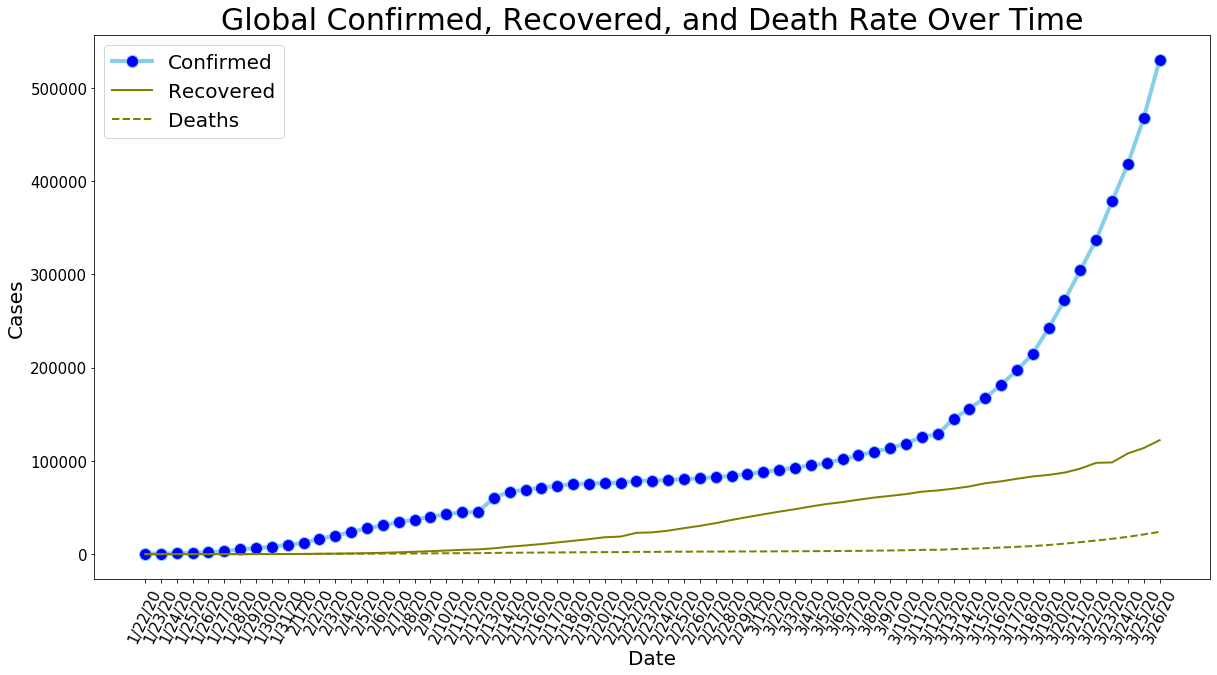

In [62]:
plt.figure(figsize=(20,10))

plt.title('Global Confirmed, Recovered, and Death Rate Over Time',size=30)
plt.plot( 'date', 'Confirmed', data=df_merged, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'date', 'Recovered', data=df_merged, marker='', color='olive', linewidth=2)
plt.plot( 'date', 'Deaths', data=df_merged, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xticks(rotation=65,size=15)
_=plt.yticks(size=15)

Now, how does the U.S. compare to the amount of cases in China? Let's attempt to graph it on the same chart.

In [63]:
confirmed_us = confirmed[confirmed['Country/Region']=='US']
confirmed_us = confirmed_us.groupby(confirmed_us['Country/Region']).sum() #Summing up all the cases for each date

# taking confirmed cases growth over the time
confirmed_us = confirmed_us.iloc[0][2:confirmed_us.shape[1]]

In [64]:
us = pd.DataFrame(data=confirmed_us).reset_index()
us = us.rename(index=str, columns={'index':'Date'})
us.head()

,Date,US
0,1/22/20,1.0
1,1/23/20,1.0
2,1/24/20,2.0
3,1/25/20,2.0
4,1/26/20,5.0


In [65]:
confirmed_china = confirmed[confirmed['Country/Region']=='China']
confirmed_china = confirmed_china.groupby(confirmed_china['Country/Region']).sum()

# taking confirmed cases growth over the time
confirmed_china = confirmed_china.iloc[0][2:confirmed_china.shape[1]]

In [66]:
china = pd.DataFrame(data=confirmed_china).reset_index()
china = china.rename(index=str, columns={'index':'Date'})
china.head()

,Date,China
0,1/22/20,548.0
1,1/23/20,643.0
2,1/24/20,920.0
3,1/25/20,1406.0
4,1/26/20,2075.0


In [67]:
#Now we join these two together on the data coloumn
data_frames = [china, us]
china_us = reduce(lambda left, right: pd.merge(left, right, on = ['Date'],
                                              how = 'outer'), data_frames)

In [69]:
china_us.head()

,Date,China,US
0,1/22/20,548.0,1.0
1,1/23/20,643.0,1.0
2,1/24/20,920.0,2.0
3,1/25/20,1406.0,2.0
4,1/26/20,2075.0,5.0


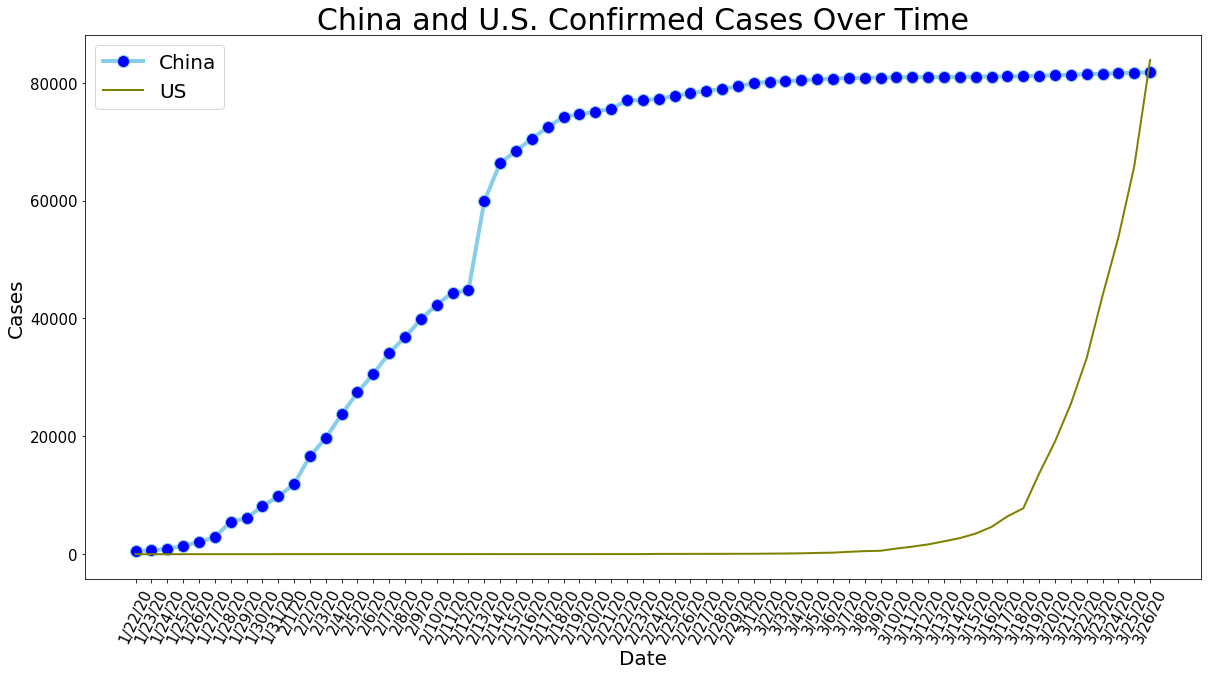

In [70]:
plt.figure(figsize=(20,10))

plt.title('China and U.S. Confirmed Cases Over Time',size=30)
plt.plot( 'Date', 'China', data=china_us, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'US', data=china_us, marker='', color='olive', linewidth=2)
plt.legend(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xticks(rotation=65,size=15)
_=plt.yticks(size=15)

Looks like the U.S has surpassed the amount of confirmed cases than China. This is *not* good. Let's now look at the recovery and death rates for these two countries. This requires a similar process to make the graph above.

In [25]:
recovered_us = recovered[recovered['Country/Region']=='US']
recovered_us = recovered_us.groupby(recovered_us['Country/Region']).sum()

# taking confirmed cases growth over the time
recovered_us = recovered_us.iloc[0][2:recovered_us.shape[1]]

In [29]:
us = pd.DataFrame(data=recovered_us).reset_index()
us = us.rename(index=str, columns={'index':'Date'})
us.head()

,Date,US
0,1/22/20,0.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0


In [27]:
recovered_china = recovered[recovered['Country/Region']=='China']
recovered_china = recovered_china.groupby(recovered_china['Country/Region']).sum()

# taking confirmed cases growth over the time
recovered_china = recovered_china.iloc[0][2:recovered_china.shape[1]]

In [30]:
china = pd.DataFrame(data=confirmed_china).reset_index()
china = china.rename(index=str, columns={'index':'Date'})
china.head()

,Date,China
0,1/22/20,548.0
1,1/23/20,643.0
2,1/24/20,920.0
3,1/25/20,1406.0
4,1/26/20,2075.0


In [31]:
data_frames = [china, us]
china_us_recovered = reduce(lambda left, right: pd.merge(left, right, on = ['Date'],
                                              how = 'outer'), data_frames)

In [32]:
china_us_recovered.head()

,Date,China,US
0,1/22/20,548.0,0.0
1,1/23/20,643.0,0.0
2,1/24/20,920.0,0.0
3,1/25/20,1406.0,0.0
4,1/26/20,2075.0,0.0


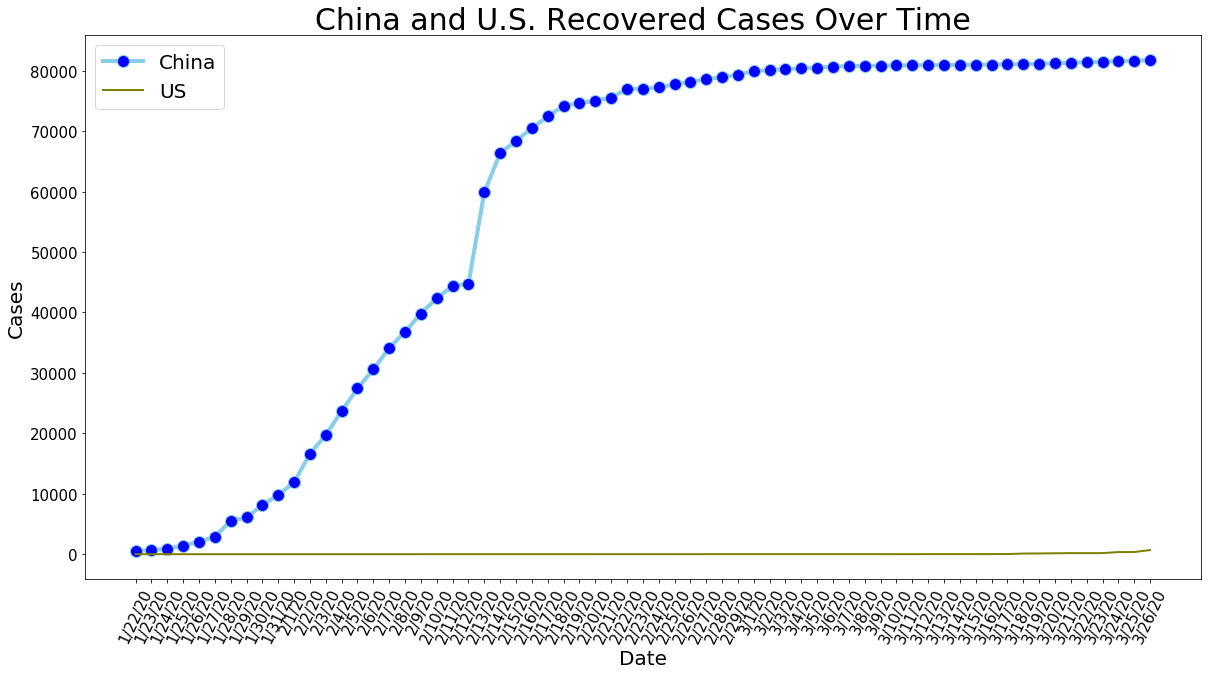

In [33]:
plt.figure(figsize=(20,10))

plt.title('China and U.S. Recovered Cases Over Time',size=30)
plt.plot( 'Date', 'China', data=china_us_recovered, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'US', data=china_us_recovered, marker='', color='olive', linewidth=2)
plt.legend(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xticks(rotation=65,size=15)
_=plt.yticks(size=15)

Looks like China had a significant amount of recoveries. Since the U.S. is just being hit with the virus, we expect the recoveries to be pretty low for now.

In [38]:
#deaths_us = deaths[deaths['Country/Region']=='US']
#deaths_us = deaths_us.groupby(deaths_us['Country/Region']).sum()

# taking confirmed cases growth over the time
#deaths_us = deaths_us.iloc[0][2:deaths_us.shape[1]]

In [43]:
deaths.fillna(0) #We were getting errors by using the commented code above before. So, since we're only concered about the 
#countries and the counts of cases, will replace any nan values with 0.

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,4
1,0,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1,2,2,2,2,2,4,5,5,6
2,0,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4,7,9,11,15,17,17,19,21,25
3,0,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,3
4,0,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,0,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
deaths_us = deaths[deaths['Country/Region']=='US']
deaths_us = deaths_us.groupby(deaths_us['Country/Region']).sum()

# taking confirmed cases growth over the time
deaths_us = deaths_us.iloc[0][2:deaths_us.shape[1]]

In [45]:
us = pd.DataFrame(data=deaths_us).reset_index()
us = us.rename(index=str, columns={'index':'Date'})
us.head()

,Date,US
0,1/22/20,0.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0


In [50]:
deaths_china = deaths[deaths['Country/Region']=='China']
deaths_china = deaths_china.groupby(deaths_china['Country/Region']).sum()

# taking confirmed cases growth over the time
deaths_china = deaths_china.iloc[0][2:deaths_china.shape[1]]

In [51]:
china = pd.DataFrame(data=deaths_china).reset_index()
china = china.rename(index=str, columns={'index':'Date'})
china.head()

,Date,China
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0


In [52]:
data_frames = [china, us]
china_us_deaths = reduce(lambda left, right: pd.merge(left, right, on = ['Date'],
                                              how = 'outer'), data_frames)

In [53]:
china_us_deaths.head()

,Date,China,US
0,1/22/20,17.0,0.0
1,1/23/20,18.0,0.0
2,1/24/20,26.0,0.0
3,1/25/20,42.0,0.0
4,1/26/20,56.0,0.0


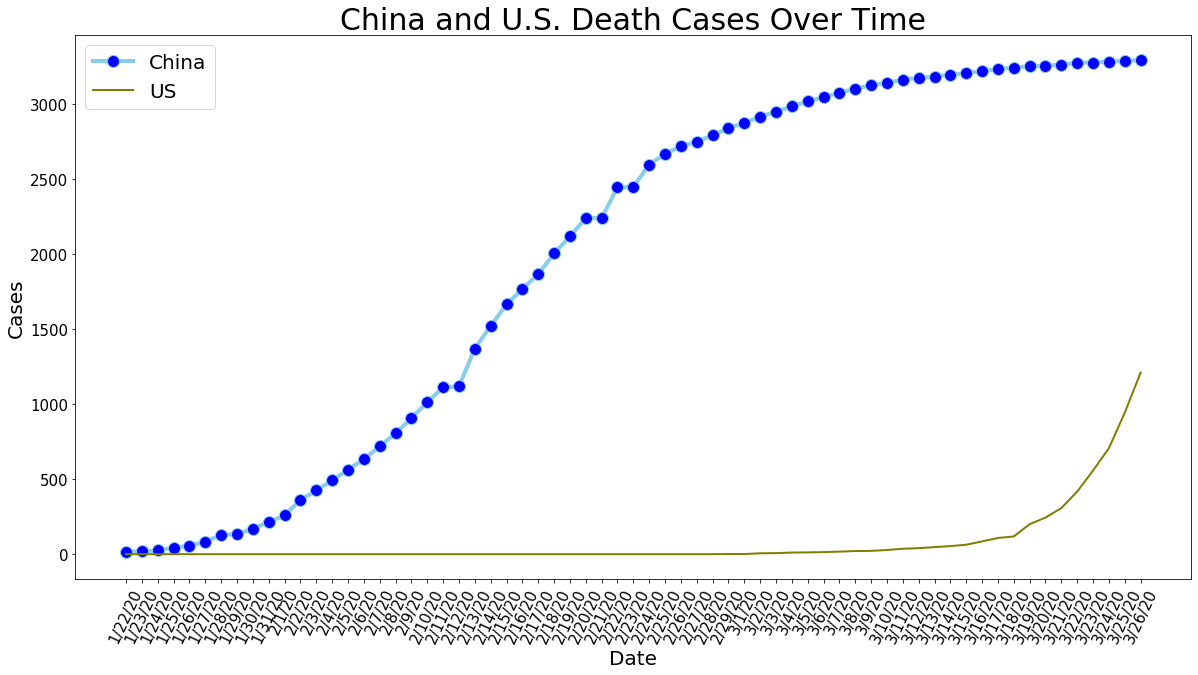

In [54]:
plt.figure(figsize=(20,10))

plt.title('China and U.S. Death Cases Over Time',size=30)
plt.plot( 'Date', 'China', data=china_us_deaths, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'US', data=china_us_deaths, marker='', color='olive', linewidth=2)
plt.legend(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xticks(rotation=65,size=15)
_=plt.yticks(size=15)

The US looks like its having a steeper incline in deaths when compared to China. Again, this is not a good sign for our near future.

#### How about the rest of the world? Let's look at countries with over 1000 cases

In [78]:
df = confirmed.groupby(['Country/Region'], as_index=False)[confirmed.columns[4:]].sum() #summing up all the dates
df = df.rename(index=str, columns={'Country/Region':'Country_Region'})

In [79]:
 df['Country_Region'].replace({'Korea, South': "South Korea"}, inplace=True) #to avoid a future possible error

In [80]:
df = df.melt(id_vars='Country_Region', var_name='date', value_name='count')
#Here, we're using the melt function in order to sort all the dates as one column 'date', while also keeping track
#of which country and respective count that is paired with that specific date.

In [81]:
df_1 = df[df['count'] > 1000]

In [82]:
df_1.head()

,Country_Region,date,count
558,China,1/25/20,1406
733,China,1/26/20,2075
908,China,1/27/20,2877
1083,China,1/28/20,5509
1258,China,1/29/20,6087


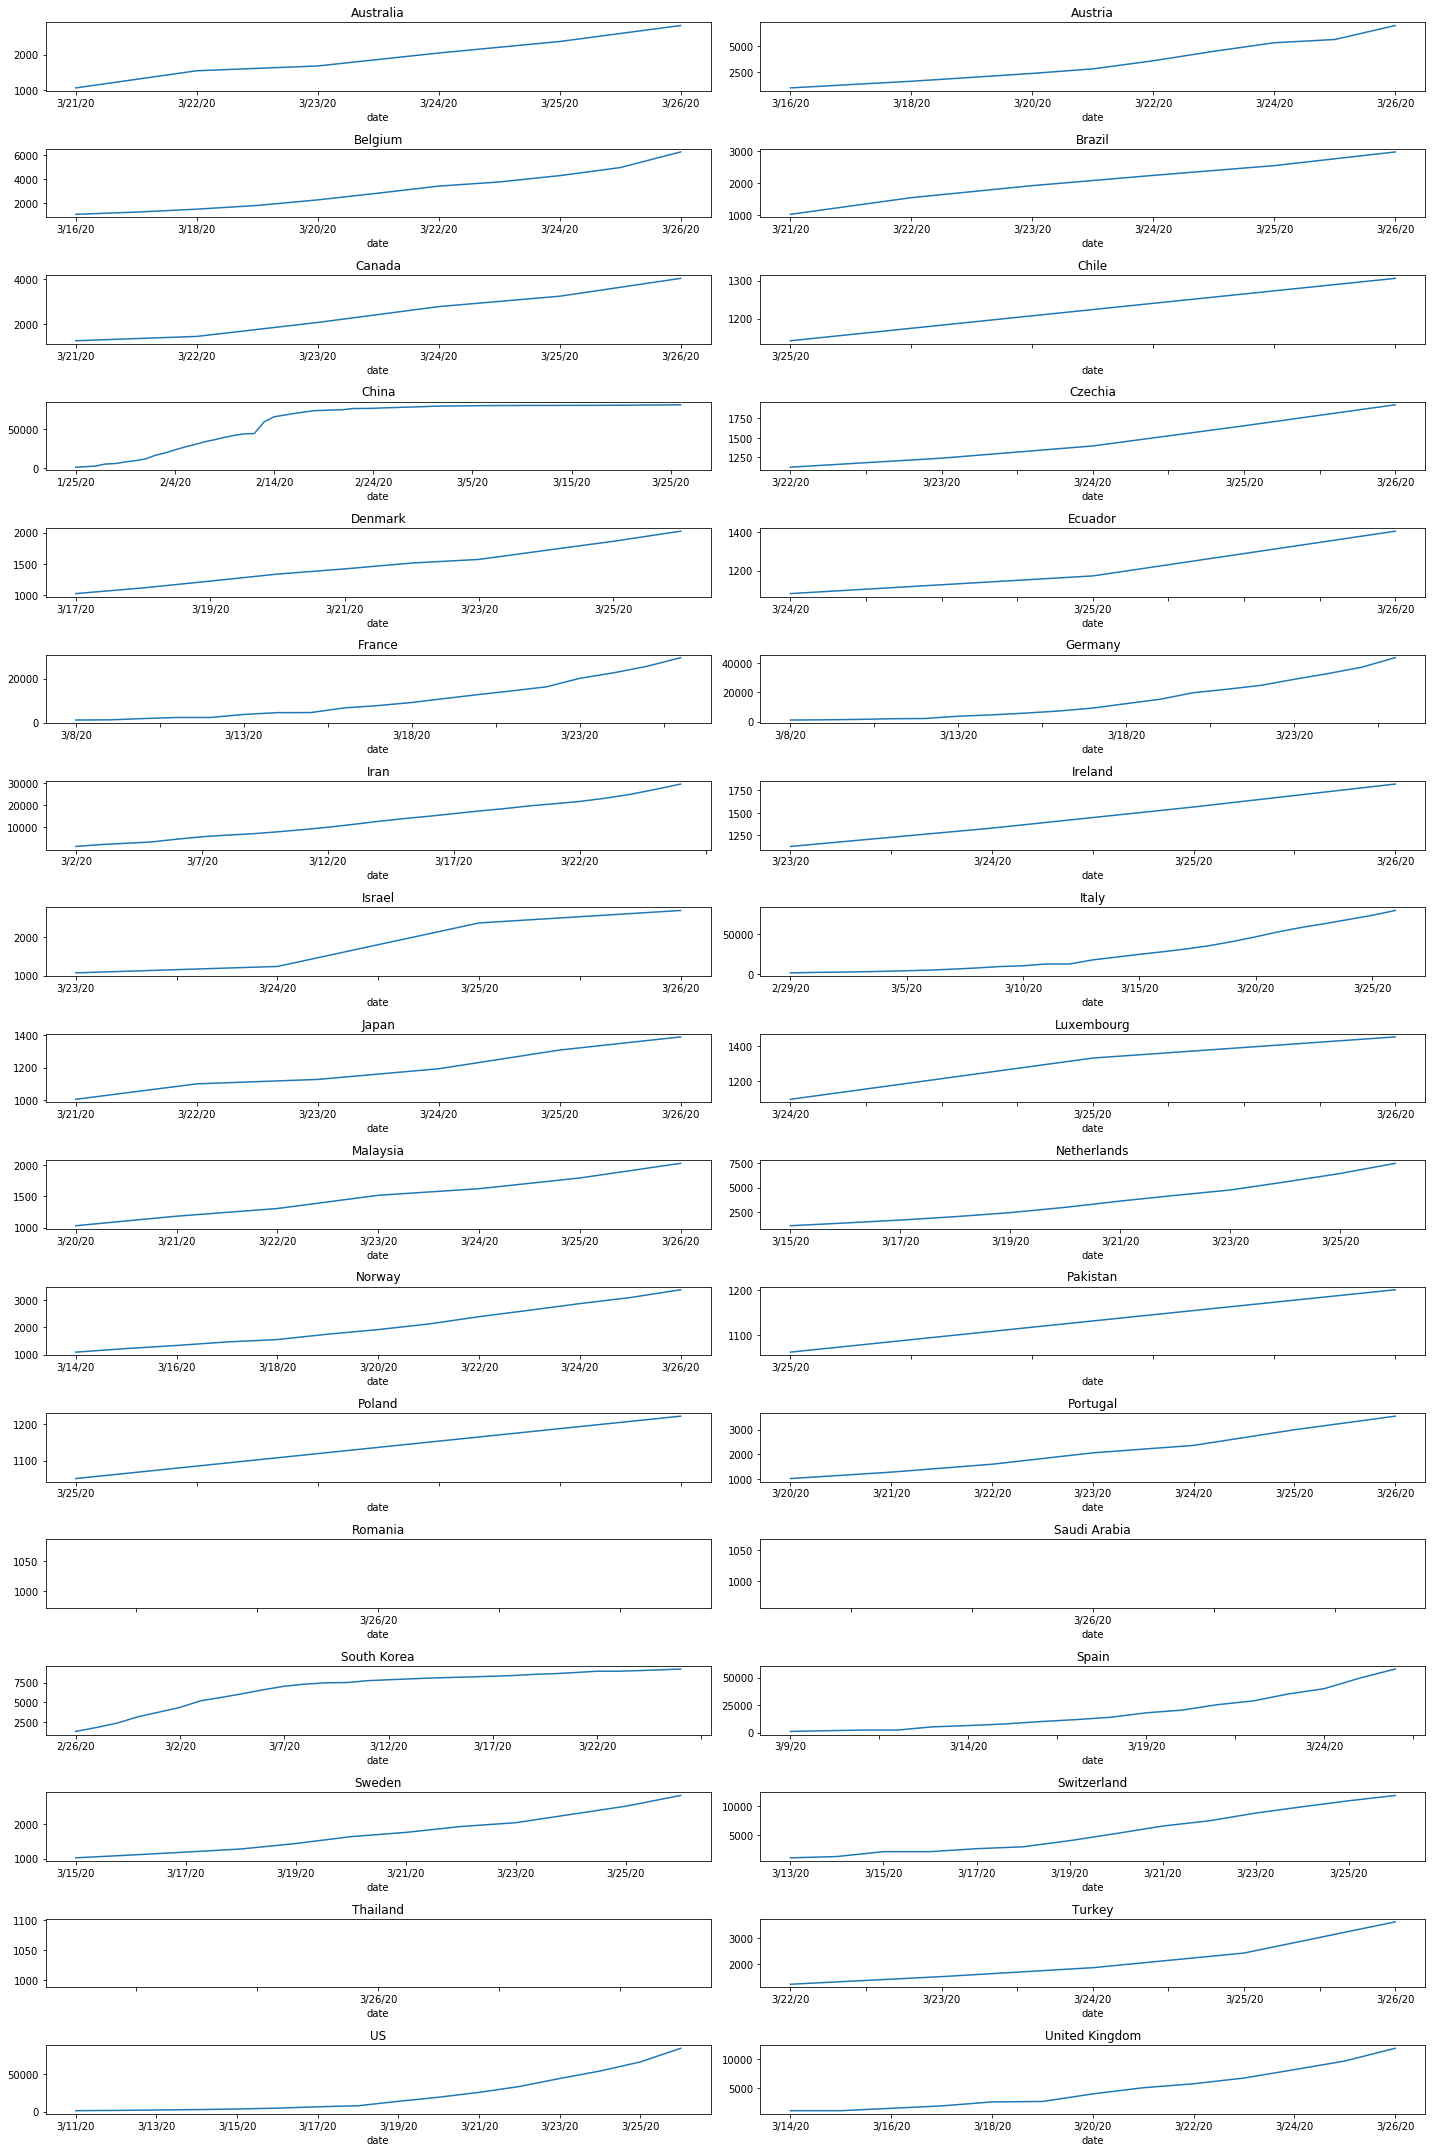

In [84]:
plt.figure(figsize=(20,30))

plot_number = 1
for countryname, selection in df_1.groupby("Country_Region"):
    ax = plt.subplot(17, 2, plot_number)
    selection.plot(x='date', y='count', ax=ax, label=countryname, legend=False)
    ax.set_title(countryname)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

We see that some of these countries are having serious spikes in confirmed cases in a short amount of days. This virus spreads very easily, just by judging on the growth rate of the confirmed cases in these countries alone. Let's hope we can find a solution to this virus in the near future.